## Regression analysis of the energy consumption data

- Preparing the data 
- Visualize the data 
- Forecasting 

In [1]:
import pyodbc
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import mysql.connector 
from mysql.connector import (connection)
import datetime as dt
import time
import statsmodels.api as sm 


mydb = mysql.connector.connect(
    host="data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com", 
    user="deepAnalytics", 
    passwd="Sqltask1234!", 
    database="dataanalytics2018")

cursor = mydb.cursor(buffered=True)
print(cursor)



MySQLCursorBuffered: (Nothing executed yet)


### Preparing the data 

In [2]:
cursor.execute("Show Tables")
for x in cursor: 
    print(x) 

('iris',)
('yr_2006',)
('yr_2007',)
('yr_2008',)
('yr_2009',)
('yr_2010',)


In [3]:
yr_2007 = ("Select * from yr_2007")
yr_2007_DF = pd.read_sql(yr_2007, mydb)

In [4]:
yr_2008 = ("Select * from yr_2008")
yr_2008_DF = pd.read_sql(yr_2008, mydb)

In [5]:
yr_2009 = ("Select * from yr_2009")
yr_2009_DF = pd.read_sql(yr_2009, mydb)

In [6]:
yr_2007_DF['Price'] = 0.1211
yr_2008_DF['Price'] = 0.1213
yr_2009_DF['Price'] = 0.1206

In [7]:
Full_DF = pd.concat([yr_2007_DF, yr_2008_DF, yr_2009_DF])

In [8]:
Full_DF = Full_DF[["Date","Time","Sub_metering_1","Sub_metering_2","Sub_metering_3","Price"]]

In [9]:
Full_DF["Date_time"]=pd.to_datetime(Full_DF['Date'] + ' ' + Full_DF['Time'])

In [10]:
cols = Full_DF.columns.tolist()
cols.insert(0, cols.pop(cols.index('Date_time')))
Full_DF = Full_DF.reindex(columns= cols)

In [11]:
Full_DF["Year"] = pd.DatetimeIndex(Full_DF["Date_time"]).year
Full_DF["Month"] = pd.DatetimeIndex(Full_DF["Date_time"]).month
Full_DF["Day"] = pd.DatetimeIndex(Full_DF["Date_time"]).day
Full_DF["Hour"] = pd.DatetimeIndex(Full_DF["Date_time"]).hour
Full_DF["Minute"] = pd.DatetimeIndex(Full_DF["Date_time"]).minute
Full_DF["Quarter"] = pd.DatetimeIndex(Full_DF["Date_time"]).quarter
Full_DF["Week"] = pd.DatetimeIndex(Full_DF["Date_time"]).week

In [56]:
#Full_DF = Full_DF[Full_DF["Minute"] == 0]
Full_DF.columns

Index(['Date', 'Time', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
       'Price', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Quarter', 'Week'],
      dtype='object')

In [ ]:
Full_DF.isnull().sum()

### Visualize the data 

In [ ]:
plt.hist(Full_DF["Sub_metering_3"])

In [ ]:
plt.scatter(Full_DF["Minute"],Full_DF["Sub_metering_3"])

In [ ]:
oneYear = Full_DF["Year"]==2007 
#oneMonth = Full_DF["Month"]==1 
#oneDay = Full_DF["Day"]==9
#OneHour = Full_DF["Hour"]== 
#OneMinute = Full_DF["Minute"]== 

In [ ]:
Full_DF[(Full_DF.Year == 2007)]

In [ ]:
Full_DF.groupby('Year').size()

In [34]:
Full_DF[oneYear].plot(x="Date_time", y="Sub_metering_1")

NameError: name 'oneYear' is not defined

In [ ]:
Full_DF.groupby(['Year']).sum()
Full_DF[(Full_DF.Year == 2007)]

In [46]:
Months_2007 = Full_DF[(Full_DF.Year == 2007)].groupby(['Month'])['Sub_metering_1','Sub_metering_2'].sum()
Months_2007.plot.bar()

SyntaxError: invalid syntax (<ipython-input-46-1e67b88cbac7>, line 2)

In [ ]:
Months_2008 = Full_DF[(Full_DF.Year == 2008)].groupby(['Month'])['Sub_metering_1','Sub_metering_2'].sum()
Months_2008.plot.bar()

In [ ]:
Months_2009 = Full_DF[(Full_DF.Year == 2009)].groupby(['Month'])['Sub_metering_1','Sub_metering_2'].sum()
Months_2009.plot.bar()



In [ ]:
Months_2010 = Full_DF[(Full_DF.Year == 2010)].groupby(['Month'])['Sub_metering_1','Sub_metering_2'].sum()
Months_2010.plot.bar()

In [ ]:
Full_DF.groupby(['Year'])[“Sub_metering_1”].sum()

In [50]:
Sub_metering_1 = Full_DF.groupby(['quarter','Year'])['Sub_metering_1'].sum()
Sub_metering_1.plot.bar(figsize=(10,7))

KeyError: ('quarter', 'Year')

In [ ]:
Sub_metering_1 = Full_DF.groupby(['Year','Month'])['Sub_metering_1','Sub_metering_2','Sub_metering_3'].sum()
Sub_metering_1.plot.area(figsize=(20,10), color=['k','c','b'])

In [ ]:
test = Full_DF.groupby(['Year', 'Month'])['Month'].sum().unstack('Month')
test.plot(kind='bar', stacked=True, figsize=(7,7))

In [ ]:
Months_2009.plot.pie()

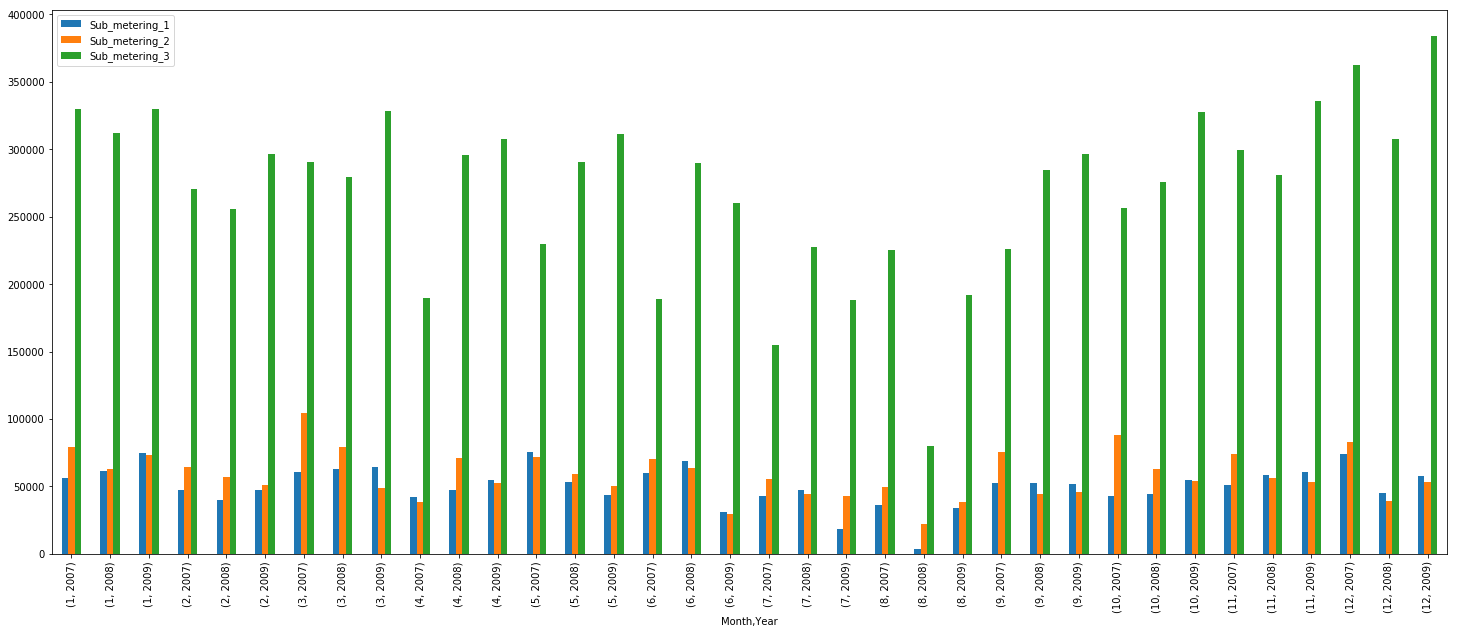

In [49]:
test = Full_DF.groupby(['Month','Year'])['Sub_metering_1','Sub_metering_2','Sub_metering_3'].sum()
test.plot.bar(figsize=(25,10))

In [ ]:
test1 = Full_DF.groupby(['Month','Year'])['Sub_metering_3'].sum()
test1.plot.bar(figsize=(25,10))

### Adding new variables into the model 

In [ ]:
weather = pd.read_csv("/Users/peterhng/Downloads/forecast.csv", sep=";", skiprows=6,encoding = "ISO-8859-1",index_col=False)

In [ ]:
weather.isnull().sum()

In [ ]:
weather["Local time in Paris / Orly (airport)"] = pd.to_datetime(weather["Local time in Paris / Orly (airport)"], dayfirst=True)


In [ ]:
weather = weather.sort_values(by="Local time in Paris / Orly (airport)", axis=0, ascending=True)

In [ ]:
weather = weather[["Local time in Paris / Orly (airport)", "T", "P"]]
weather.head()

In [ ]:
weather = weather.rename(columns={"Local time in Paris / Orly (airport)": 'Date_time'})
weather.head()

In [ ]:
New = pd.merge(Full_DF, weather, how='left', on="Date_time")
New.head()

In [ ]:
New.isna().sum()

In [ ]:
New.fillna(method='pad', inplace=True)

In [ ]:
New.drop(New.index[0], inplace=True)
New.head()

In [ ]:
sns.heatmap(New.corr(),cmap="YlGnBu")


In [ ]:
New.corr()

In [48]:
plt.boxplot([New['Sub_metering_1'],New['Sub_metering_2'],New['Sub_metering_3']])

NameError: name 'New' is not defined

In [ ]:
sns.scatterplot(x=New['Hour'], y=New['Sub_metering_1'])

### Forecast

**ARIMA** 

The general process for ARIMA models is the following: 

- Visualize the Time Series Data 
- Make the Time Serias Data stationary 
- Plot the Correlation and AutoCorrelation Charts
- Construct the ARIMA model
- Use the model to make predictions 

In [ ]:
Full_DF["Sub_metering_1"].plot()

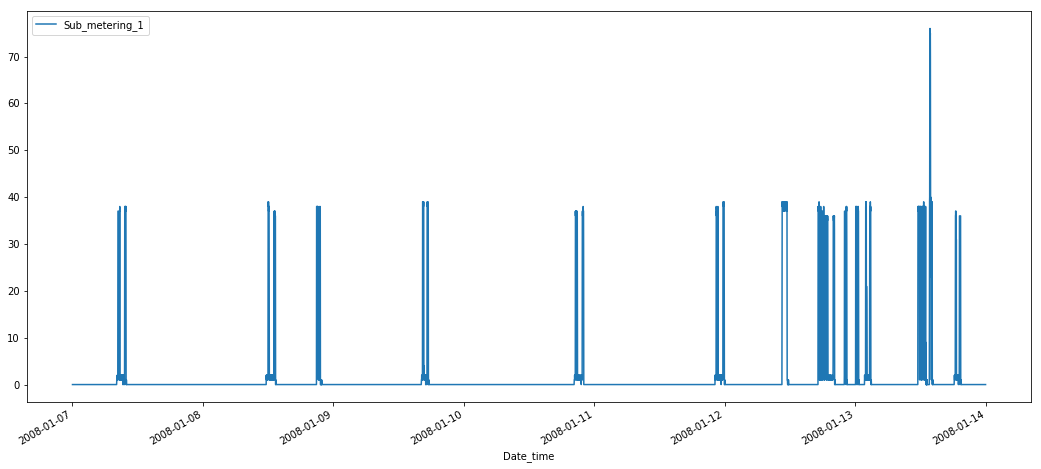

In [64]:
houseweek = Full_DF[(Full_DF.Year == 2008) & (Full_DF.Week == 2)]
houseweek.plot(x="Date_time", y="Sub_metering_1")

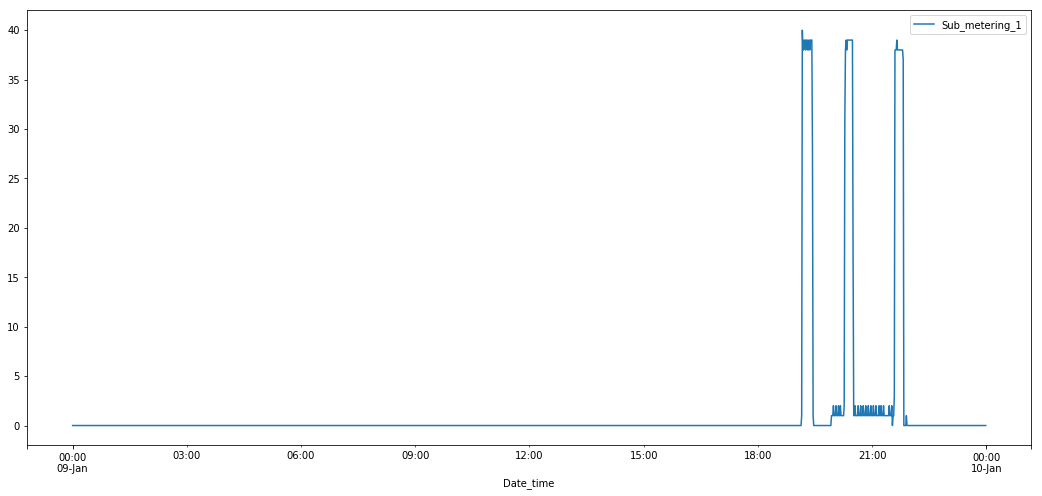

In [65]:
houseday = Full_DF[(Full_DF.Year == 2009) & (Full_DF.Month == 1) & (Full_DF.Day == 9)]
houseday.plot(x='Date_time', y='Sub_metering_1')

In [ ]:
houseday = Full_DF[(Full_DF.Year == 2009) & (Full_DF.Month == 1) & (Full_DF.Day == 9)].groupby(['Minute'])['Sub_metering_1','Sub_metering_1',].sum()
houseday.plot()

In [ ]:
test = Full_DF.groupby(['Year',"Month"])['Sub_metering_1','Sub_metering_2','Sub_metering_3'].sum()
test.plot(figsize=(10,10))

### SMA - Simple Moving Avarage

(Previously we learnt about Simple Avarage and Naive Avarage.)

In [82]:
time_series = Full_DF["Sub_metering_2"].resample('MS').mean()
type(time_series)

pandas.core.series.Series

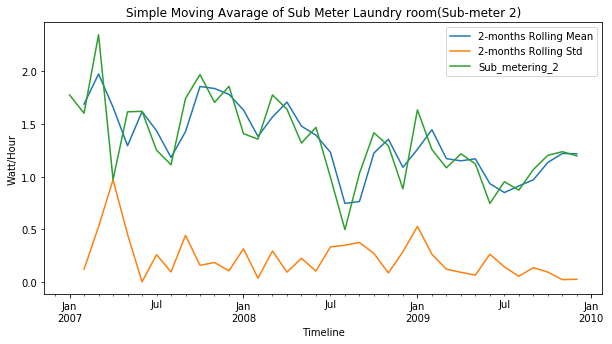

In [84]:
time_series.rolling(2).mean().plot(label="2-months Rolling Mean")
time_series.rolling(2).std().plot(label="2-months Rolling Std")
time_series.plot(figsize=(10,5), title='Simple Moving Avarage of Sub Meter Laundry room(Sub-meter 2)')
plt.ylabel('Watt/Hour')
plt.xlabel('Timeline')
plt.legend()



In [76]:
time_series_test = Full_DF[(Full_DF.Year == 2009)]["Sub_metering_1"]
type(time_series_test)


pandas.core.series.Series

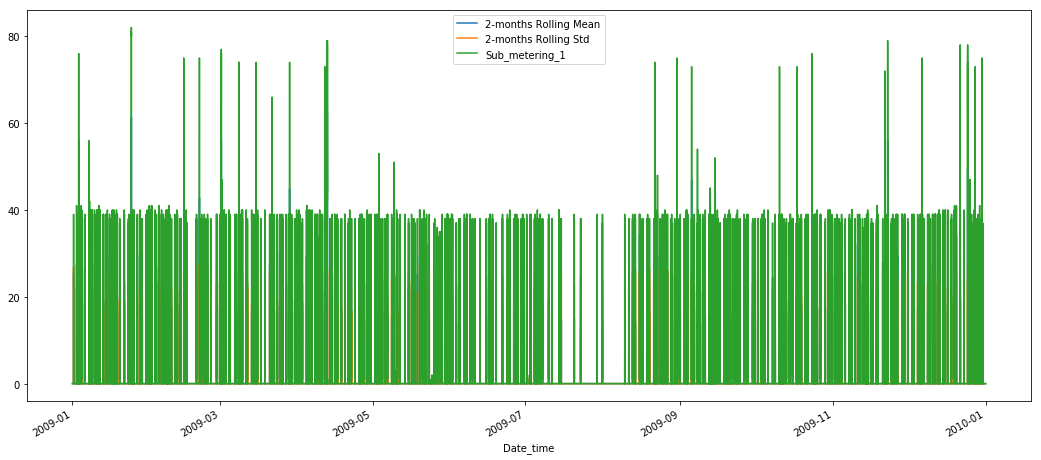

In [80]:
time_series_test.rolling(30).mean().plot(label="2-months Rolling Mean")
time_series_test.rolling(2).std().plot(label="2-months Rolling Std")
time_series_test.plot()
plt.legend()

### Decomposition

ETS model (Error-Trend-Seasonality) 

- Exponential Smooting 
- Trend Method Models 
- ETS Decomposition 

In [13]:
Full_DF.set_index('Date_time', inplace=True)

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
decomposition_DF = Full_DF["Sub_metering_2"].resample('MS').mean()
decomposition_DF.tail()

Date_time
2009-08-01    0.873551
2009-09-01    1.068222
2009-10-01    1.203634
2009-11-01    1.237830
2009-12-01    1.198306
Freq: MS, Name: Sub_metering_2, dtype: float64

In [16]:
seasonal_decompose(decomposition_DF)

In [74]:
from pylab import rcParams 
rcParams['figure.figsize'] = 10, 5

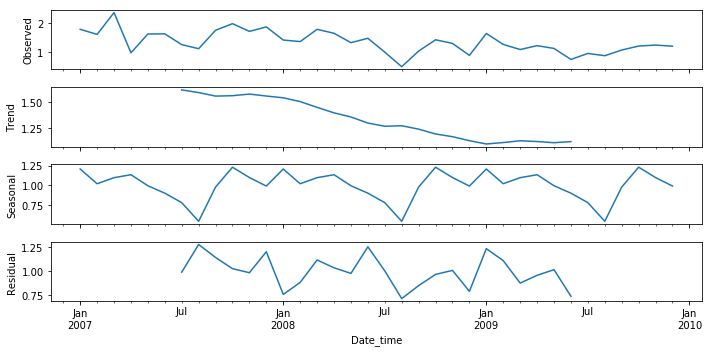

In [87]:
decomposition = sm.tsa.seasonal_decompose(decomposition_DF, model="multiplicative")
fig = decomposition.plot()

### Stationarity 

In [86]:
from statsmodels.tsa.stattools import adfuller

In [88]:
result = adfuller(decomposition_DF)

(-3.046159727439583,
 0.030802786591091164,
 0,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 86.4084887327632)

In [89]:
def adf_check(time_series):
    result = adfuller(time_series)
    print ("Augmented Dicky-Fuller Test")
    labels = ["ADF Test Statistics", 'p-value', '# of Lags', '# of observation used']
    
    for value, label in zip(result, labels):
        print (label+ " : " + str(value))
        
    if result[1] <= 0.05: 
        print ("Strong evidence against null hypothesis.")
        print ("Reject Null hypothesis.")
        print ("Data has no unit root and is stationary.")
    
    else:
        print ("Week evidence against null hypothesis.")
        print ("Fail to reject null hypothesis.")
        print ("Data has a unit root and it is non-stationary.")

Text(0.5, 0, 'Timeline')

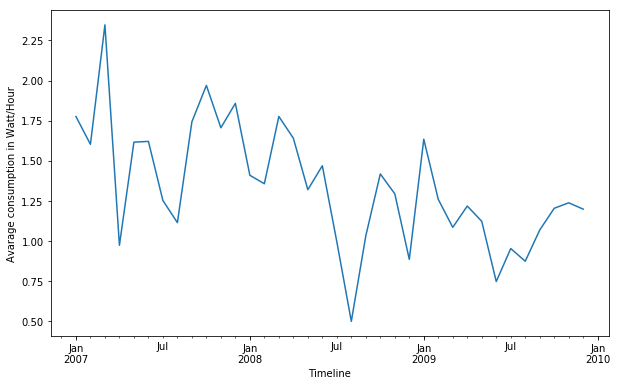

In [88]:
decomposition_DF.plot(figsize=(10,6))
plt.ylabel('Avarage consumption in Watt/Hour')
plt.xlabel('Timeline')

In [77]:
adf_check(decomposition_DF)

Augmented Dicky-Fuller Test
ADF Test Statistics : -4.858165804714863
p-value : 4.2038347370070825e-05
# of Lags : 0
# of observation used : 35
Strong evidence against null hypothesis.
Reject Null hypothesis.
Data has no unit root and is stationary.


In [90]:
Full_DF['first_difference_SB1'] = Full_DF['Sub_metering_1'] - Full_DF['Sub_metering_1'].shift(1)

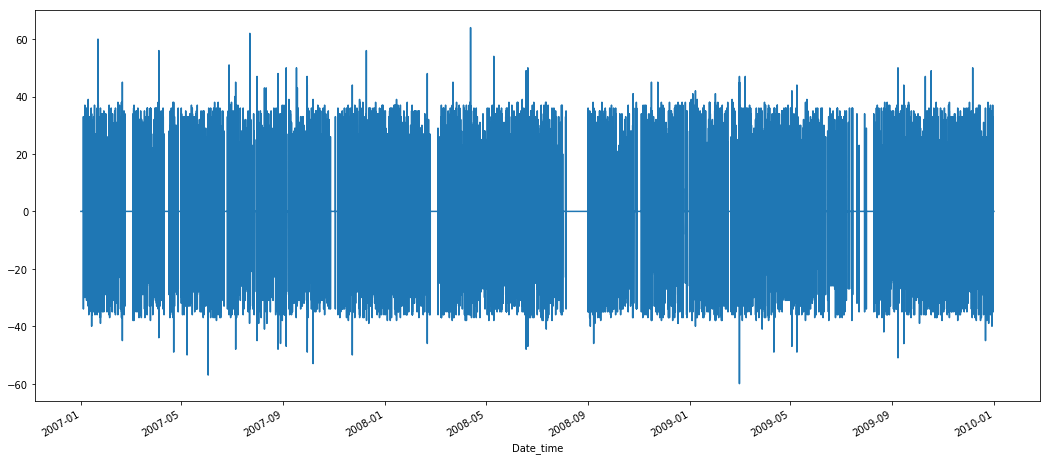

In [92]:
Full_DF['first_difference_SB1'].plot()

In [93]:
adf_check(Full_DF['first_difference_SB1'])

/Users/peterhng/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in reduce
  umr_maximum(a, axis, None, out, keepdims),
/Users/peterhng/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in reduce
  umr_minimum(a, axis, None, None, keepdims),


KeyboardInterrupt: 

In [ ]:
Full_DF["Second_difference_SB1"] = Full_DF['first_difference_SB1'] - Full_DF['first_difference_SB1'].shift(1)
Full_DF["Second_difference_SB1"].plot()

In [ ]:
Full_DF["Seasonal_difference_SB1"] = Full_DF['Sub_metering_1'] - Full_DF['Sub_metering_1'].shift(12)
Full_DF["Seasonal_difference_SB1"].plot()

In [ ]:
Full_DF["Seasonal_First_Difference"] = Full_DF['Seasonal_difference_SB1'] - Full_DF['Seasonal_difference_SB1'].shift(12)
Full_DF["Seasonal_First_Difference"].plot()

### AutoCorrelation and Partial Correlation Plot 

- ACF: shows the correlation of the series with itself, lagged by Y time unites, So the y axis is the correcaliton and X axis is the number of time. 
- PACF: conditional correlation, 

AR with PACF, 
MA with ACF

In [95]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

In [96]:
fig_first_SB1 = plot_acf(Full_DF["first_difference_SB1"])

KeyError: 'decomposition_DF'

In [ ]:
fig_seasonal_first_SB1 = plot_acf([Full_DF["Seasonal_difference_SB1"])

In [ ]:
#from pandas import autocorrelation_plot  ## AC with pandas 

In [ ]:
#autocorrelation_plot([Full_DF["Seasonal_difference_SB1"])

In [ ]:
resul_SB1 = plot_pacf(Full_DF["first_difference_SB1"])

/Users/peterhng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


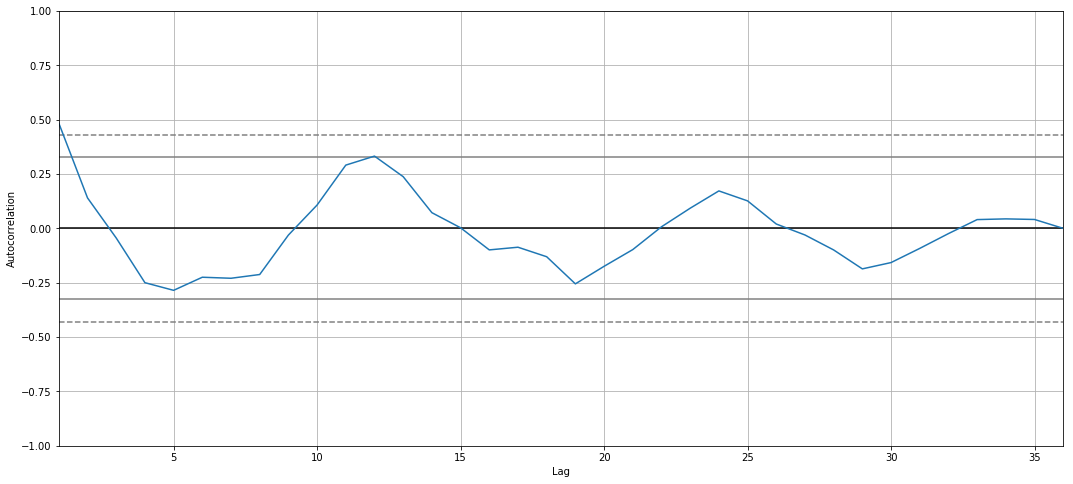

In [104]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(decomposition_DF)

### ARIMA model 

Autoregregressive Integrated Moving Avarage 

- Non-seasonal ARIMA 
- Seasonal ARIMA 

Non-seasonal ARIMA 
- use for some case when it is non-stationary 
- ARIMA ($p,d,q$):
  - AR ($p$) = Autoregressive, the number of lag observation
  - I ($d$) = Independent, the number of times that the new observation are different 
  - MA ($q$) = Moving Avarage, the size of the moving avarage window
  
Seasonal ARIMA model 
- we have in this case. ARIMA ($P, D, Q$)

In [17]:
from statsmodels.tsa.arima_model import ARIMA
import itertools

In [18]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [34]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(decomposition_DF,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:36.68336868707874
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:25.743975655276202
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:9.19379467265432
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:4.151445070719189
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:10.808377135136547
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:6.443642889910361
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:9.745472803637444
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:5.967850772692293


In [20]:
mod = sm.tsa.statespace.SARIMAX(decomposition_DF,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1169      1.191     -0.098      0.922      -2.451       2.218
ma.L1         -1.0000   6290.250     -0.000      1.000   -1.23e+04    1.23e+04
ar.S.L12      -0.4752      0.639     -0.744      0.457      -1.728       0.777
sigma2         0.1016    639.362      0.000      1.000   -1253.024    1253.227


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

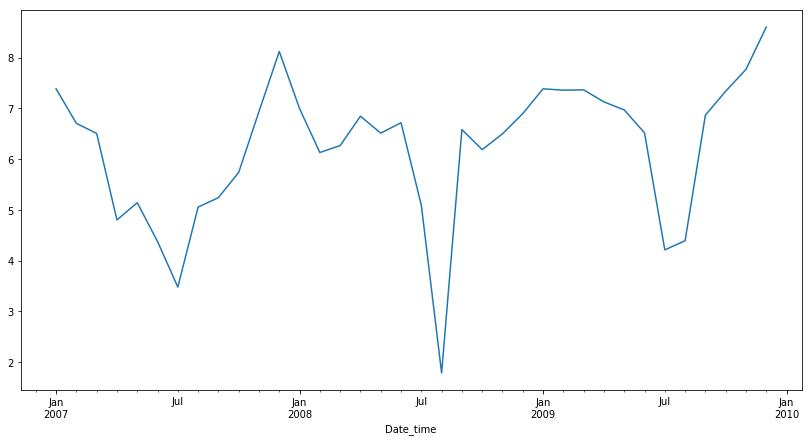

In [182]:
pred = results.get_prediction(start=pd.to_datetime('2009-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = decomposition_DF['2007':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [160]:
decomposition_DF.head()

Date_time
2007-01-01    7.383351
2007-02-01    6.703557
2007-03-01    6.504648
2007-04-01    4.800339
2007-05-01    5.139964
Freq: MS, Name: Sub_metering_3, dtype: float64

In [66]:
model = ARIMA(decomposition_DF, order=(10,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/peterhng/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/peterhng/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/peterhng/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future th

                              ARMA Model Results                              
Dep. Variable:         Sub_metering_3   No. Observations:                   36
Model:                    ARMA(10, 0)   Log Likelihood                 -54.059
Method:                       css-mle   S.D. of innovations              1.064
Date:                Thu, 25 Apr 2019   AIC                            132.119
Time:                        16:56:45   BIC                            151.121
Sample:                    01-01-2007   HQIC                           138.751
                         - 12-01-2009                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.2271      0.165     37.684      0.000       5.903       6.551
ar.L1.Sub_metering_3      0.4623      0.172      2.694      0.012       0.126       0.799
ar.L2.Su

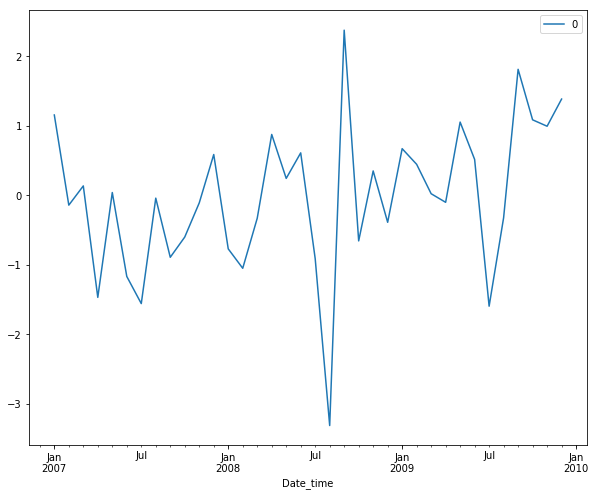

In [67]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()


               0
count  36.000000
mean   -0.028443
std     1.095362
min    -3.310597
25%    -0.683568
50%    -0.008183
75%     0.626438
max     2.376047


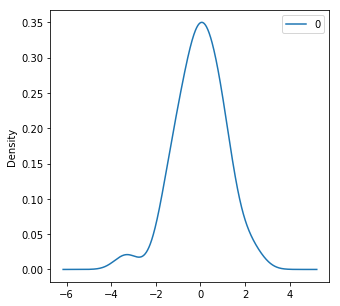

In [78]:
residuals.plot(kind='kde', figsize=(5,5))
print(residuals.describe())

In [119]:
X = decomposition_DF.values 
from sklearn.metrics import mean_squared_error

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

/Users/peterhng/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/peterhng/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/peterhng/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future th

predicted=7.179872, expected=6.895959
predicted=5.447277, expected=7.383812
predicted=6.203717, expected=7.357065
predicted=7.268729, expected=7.363614
predicted=7.294934, expected=7.126256
predicted=7.124406, expected=6.968546
predicted=7.040993, expected=6.516330
predicted=6.694415, expected=4.210413
predicted=4.803034, expected=4.390135
predicted=4.655625, expected=6.864991
predicted=6.426952, expected=7.336746
predicted=6.980961, expected=7.767055
predicted=7.560200, expected=8.600497
Test MSE: 1.481


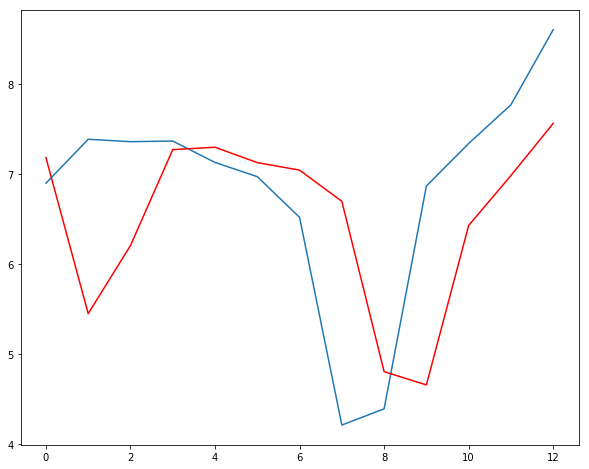

In [123]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [39]:
decomposition_DF = Full_DF["Sub_metering_3"].resample('Q').mean()
decomposition_DF.tail()

Date_time
2008-12-31    6.526651
2009-03-31    7.368539
2009-06-30    6.880638
2009-09-30    5.141638
2009-12-31    7.902888
Freq: Q-DEC, Name: Sub_metering_3, dtype: float64

In [38]:
model_SB1 = sm.tsa.statespace.SARIMAX(decomposition_DF, order=(0,1,0), seasonal_order=(0,1,0,4))
results_SB1 = model_SB1.fit()
print(results_SB1.summary())

                                 Statespace Model Results                                
Dep. Variable:                    Sub_metering_2   No. Observations:                   12
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 4)   Log Likelihood                  -3.649
Date:                           Sun, 28 Apr 2019   AIC                              9.299
Time:                                   19:52:01   BIC                              9.245
Sample:                               03-31-2007   HQIC                             8.630
                                    - 12-31-2009                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1661      0.164      1.015      0.310      -0.155       0.487
Ljung-Box (Q):                        8.46 

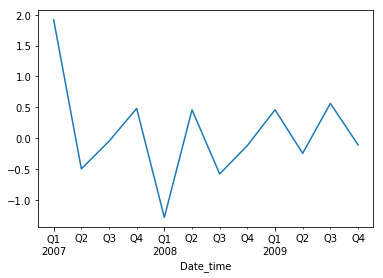

In [41]:
results_SB1.resid.plot()

In [48]:
Full_DF['Forecast_SB1'] = results_SB1.predict(start="2010-05-02", end="2010-01-01")
Full_DF[['Sub_metering_1', "Forecast_SB1"]].plot()


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
Full_DF.tail()

In [ ]:
from pandas.tseries.offsets import DateOffset

In [ ]:
future_dates = [Full_DF.index[-1] + DateOffset(months=x) for x in range(1,24)] 
future_dates 

In [ ]:
Future_DF = pd.DataFrame(index=future_dates, column=Full_DF.columns)
final_DF = pd.concat(Full_DF,Future_DF)


In [ ]:
final_DF['Forecast_SB1'] = results.predict